# Table of Contents
 <p>

In [1]:
import matplotlib_venn as vplt
import pandas as pd
import numpy as np
import scipy as scipy
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
import os
rc('text', usetex=True)
rc('text.latex', preamble=r'\usepackage{cmbright}')
rc('font', **{'family': 'sans-serif', 'sans-serif': ['Helvetica']})


%matplotlib inline

# This enables SVG graphics inline. 
%config InlineBackend.figure_formats = {'png', 'retina'}

# JB's favorite Seaborn settings for notebooks
rc = {'lines.linewidth': 2, 
      'axes.labelsize': 18, 
      'axes.titlesize': 18, 
      'axes.facecolor': 'DFDFE5'}
sns.set_context('notebook', rc=rc)
sns.set_style("dark")

mpl.rcParams['xtick.labelsize'] = 16 
mpl.rcParams['ytick.labelsize'] = 16 
mpl.rcParams['legend.fontsize'] = 14

In [2]:
q = 0.1
tidy = pd.read_csv('../output/dpy_22_results.csv')

In [3]:
tidy.head()

,Unnamed: 0,target_id,pval,qval,b,se_b,mean_obs,var_obs,tech_var,sigma_sq,smooth_sigma_sq,final_sigma_sq,ens_gene,ext_gene,strain,genotype,phenotypic class
0,0,2L52.1a,0.398331,1.0,0.302322,0.357944,3.983603,1.214993,0.161944,0.078289,0.072011,0.078289,WBGene00007063,2L52.1,PS4187,dpy22.bx93,NaN
1,1,2RSSE.1a,0.532457,1.0,0.193841,0.310514,4.246992,0.668286,0.122761,-0.055053,0.058024,0.058024,WBGene00007064,2RSSE.1,PS4187,dpy22.bx93,NaN
2,2,2RSSE.1b,0.813468,1.0,-0.125848,0.533356,3.737701,4.773003,0.173397,0.359982,0.088882,0.359982,WBGene00007064,2RSSE.1,PS4187,dpy22.bx93,NaN
3,3,3R5.1a,0.558985,1.0,-0.453203,0.775569,3.778363,1.091343,0.729480,0.398346,0.085789,0.398346,WBGene00007065,pot-3,PS4187,dpy22.bx93,NaN
4,4,3R5.1b,0.927849,1.0,-0.041794,0.461554,4.836034,0.118888,0.363477,-0.296251,0.035957,0.035957,WBGene00007065,pot-3,PS4187,dpy22.bx93,NaN


In [4]:
for g1 in tidy.strain.unique():
    list1 = tidy[(tidy.qval < q) & (tidy.strain == g1)].target_id.unique()
    for g2 in tidy.strain.unique():
        list2 = tidy[(tidy.qval < q) & (tidy.strain == g2) & (tidy.target_id.isin(list1))].ens_gene.unique()
        print(g1, g2, len(list2))

PS4187 PS4187 481
PS4187 PS4087 347
PS4187 PS4176 298
PS4087 PS4187 347
PS4087 PS4087 2863
PS4087 PS4176 955
PS4176 PS4187 298
PS4176 PS4087 955
PS4176 PS4176 2214


In [5]:
# length of triple intercept:
list1 = tidy[(tidy.qval < q) & (tidy.strain == 'PS4087')].target_id.unique()
list2 = tidy[(tidy.qval < q) & (tidy.strain == 'PS4187') & (tidy.target_id.isin(list1))].target_id.unique()
triple_list = tidy[(tidy.qval < q) & (tidy.strain == 'PS4176') & (tidy.target_id.isin(list2))]

triple = len(triple_list.ens_gene.unique())

In [6]:
# length of sy622 & bx93 - (sy622 & bx93 & het)
list1 = tidy[(tidy.qval < q) & (tidy.strain == 'PS4087')].target_id.unique()
sy622_bx93_list = tidy[(tidy.qval < q) & (tidy.strain == 'PS4187') & (tidy.target_id.isin(list1)) & (~tidy.target_id.isin(triple_list.target_id))]

sy622_bx93 = len(sy622_bx93_list.ens_gene.unique())

# length of sy622 & het - (sy622 & bx93 & het)
list1 = tidy[(tidy.qval < q) & (tidy.strain == 'PS4087')].target_id.unique()
sy622_het_list = tidy[(tidy.qval < q) & (tidy.strain == 'PS4176') & (tidy.target_id.isin(list1)) & (~tidy.target_id.isin(triple_list.target_id))]

sy622_het = len(sy622_het_list.ens_gene.unique())

# length of bx93 & het - (sy622 & bx93 & het)
list1 = tidy[(tidy.qval < q) & (tidy.strain == 'PS4187')].target_id.unique()
bx93_het_list = tidy[(tidy.qval < q) & (tidy.strain == 'PS4176') & (tidy.target_id.isin(list1)) & (~tidy.target_id.isin(triple_list.target_id))]

bx93_het = len(bx93_het_list.ens_gene.unique())

# length of sy622 - intersect:
list1 = tidy[(tidy.qval < q) & (tidy.strain == 'PS4087') & (~tidy.target_id.isin(sy622_bx93_list.target_id)) & (~tidy.target_id.isin(sy622_het_list.target_id)) & (~tidy.target_id.isin(triple_list.target_id))]

sy622 = len(list1.ens_gene.unique())

# length of bx93 - intersect:
list1 = tidy[(tidy.qval < q) & (tidy.strain == 'PS4187') & (~tidy.target_id.isin(sy622_bx93_list.target_id)) & (~tidy.target_id.isin(bx93_het_list.target_id)) & (~tidy.target_id.isin(triple_list.target_id))]

bx93 = len(list1.ens_gene.unique())

# length of het - intersect:
list1 = tidy[(tidy.qval < q) & (tidy.strain == 'PS4176') & (~tidy.target_id.isin(sy622_het_list.target_id)) & (~tidy.target_id.isin(bx93_het_list.target_id)) & (~tidy.target_id.isin(triple_list.target_id))]

het = len(list1.ens_gene.unique())

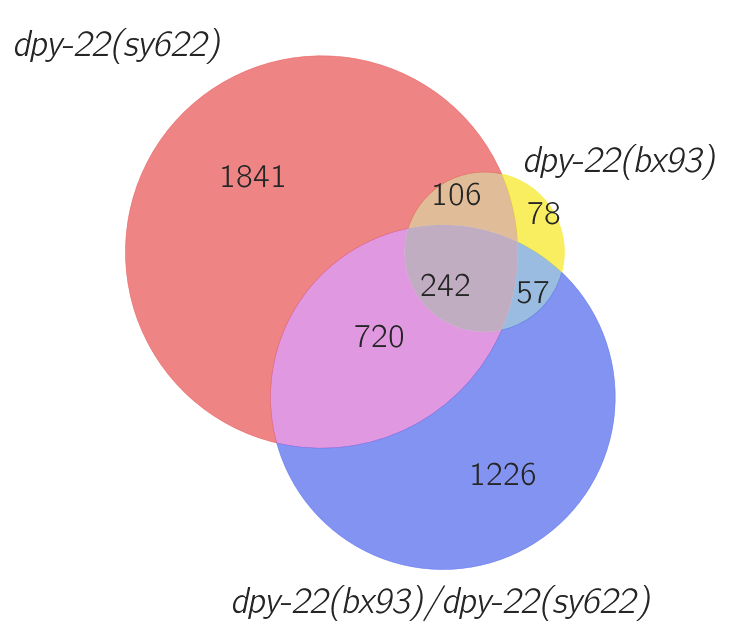

In [7]:
labels = ('\emph{dpy-22(sy622)}', '\emph{dpy-22(bx93)}', '\emph{dpy-22(bx93)/dpy-22(sy622)}')
v = vplt.venn3(subsets=(sy622, bx93, sy622_bx93, het, sy622_het, bx93_het, triple), set_labels = labels)

v.get_patch_by_id('100').set_color('#E85050')
v.get_patch_by_id('010').set_color('#F7E71D')
v.get_patch_by_id('001').set_color('#4E66ED')

v.get_patch_by_id('100').set_alpha(.7)
v.get_patch_by_id('010').set_alpha(.7)
v.get_patch_by_id('001').set_alpha(.7)

for text in v.set_labels:
    text.set_fontsize(18)
for text in v.subset_labels:
    text.set_fontsize(16)

plt.savefig('../output/venn_diagram.svg', bbox_inches='tight')